In [211]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pandas as pd

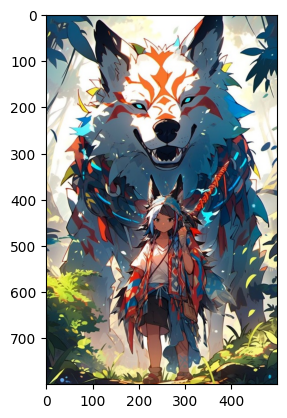

In [212]:
img = cv.imread('respon.jpg')
img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img2)

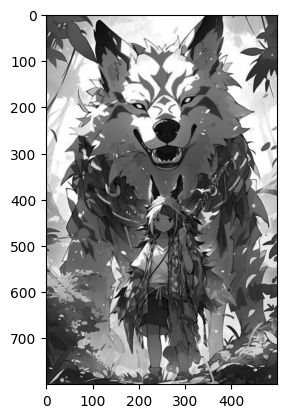

In [213]:
abu = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
grayimg = cv.cvtColor(abu, cv.COLOR_GRAY2RGB)
plt.imshow(grayimg)

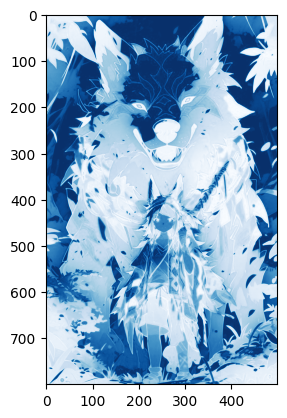

In [214]:
blue_image = img2[:,:,0]
plt.imshow(blue_image,cmap="Blues")

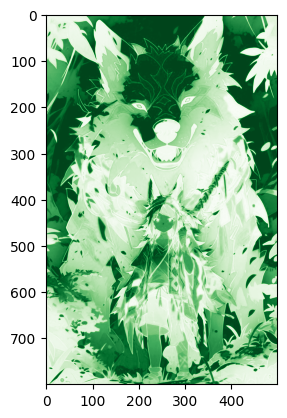

In [215]:
green_image = img2[:,:,1]
plt.imshow(blue_image,cmap="Greens")

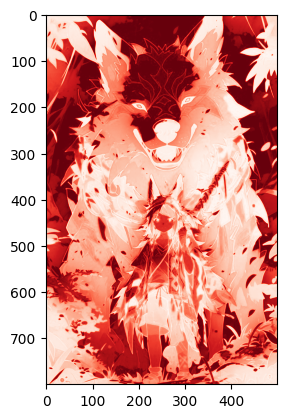

In [216]:
red_image = img2[:,:,2]
plt.imshow(blue_image,cmap="Reds")

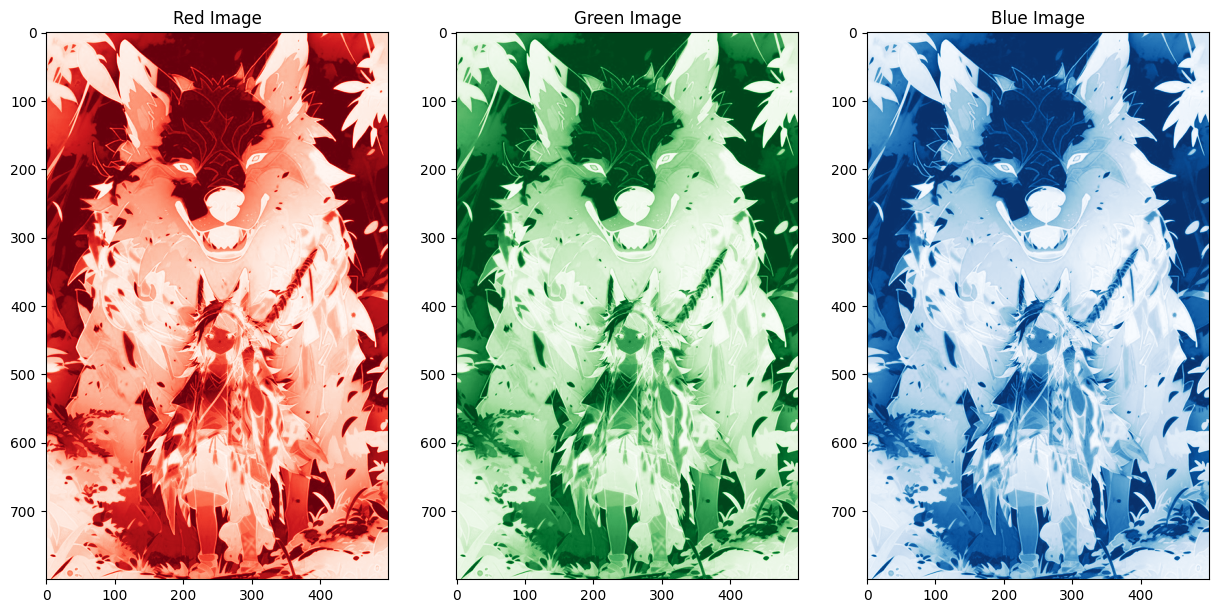

In [217]:
plt.figure( figsize = (15,10))
plt.subplot(131)
plt.title('Red Image')
plt.imshow(blue_image,cmap="Reds")
plt.subplot(132)
plt.title('Green Image')
plt.imshow(blue_image,cmap="Greens")
plt.subplot(133)
plt.title('Blue Image')
plt.imshow(blue_image,cmap="Blues")
plt.show()

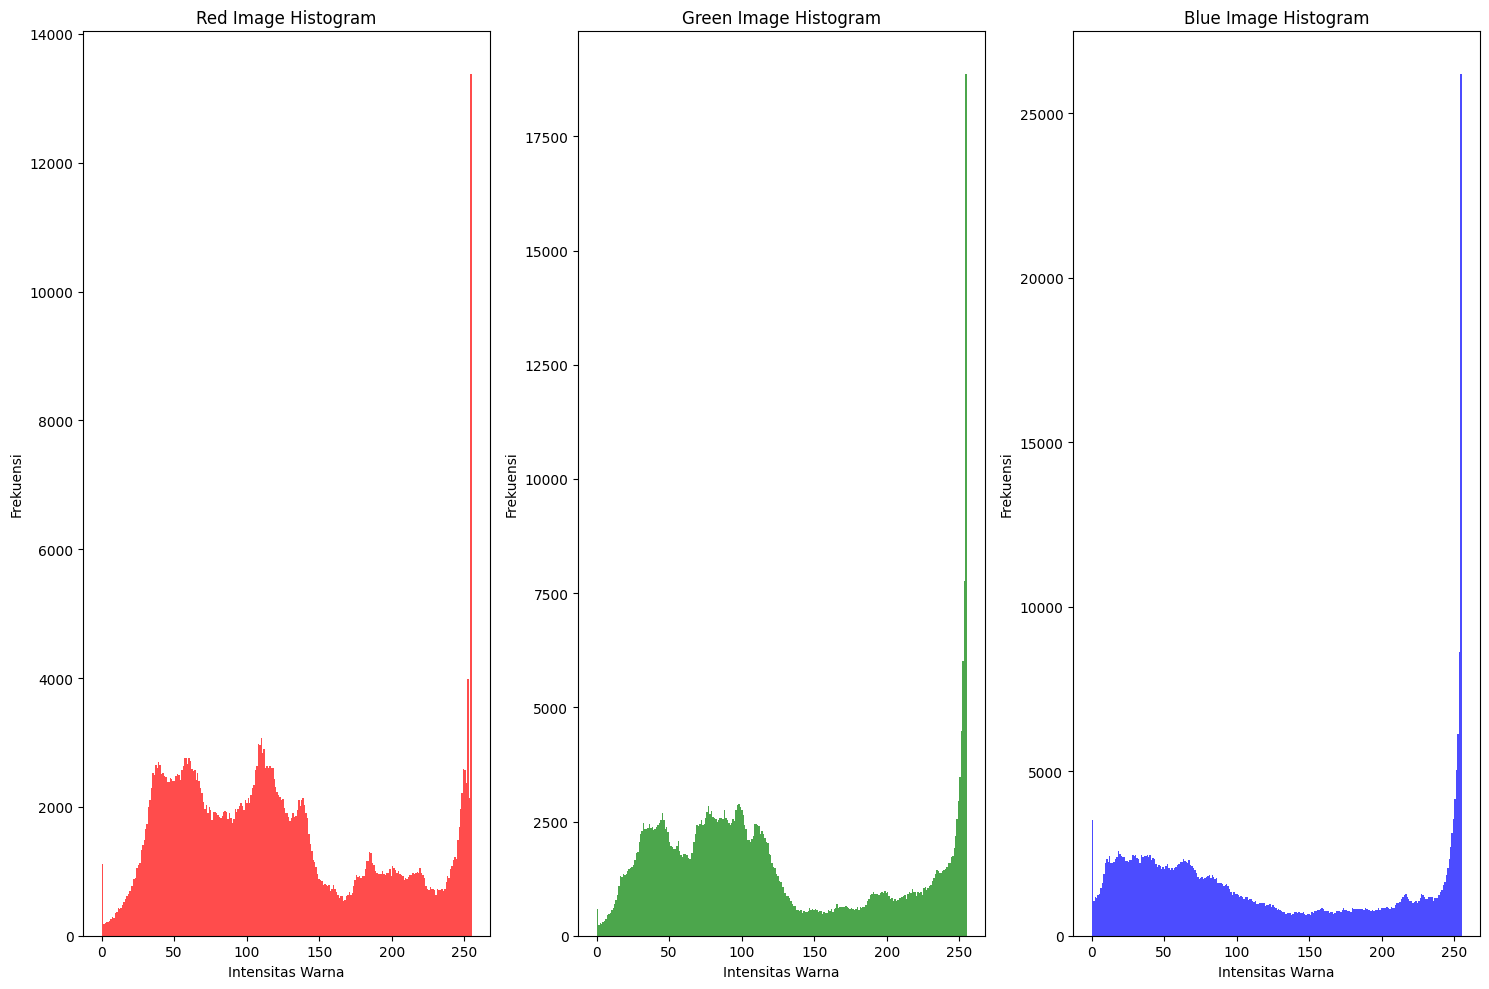

In [218]:
# Menampilkan histogram dari gambar dengan peta warna merah
plt.figure(figsize=(15, 10))

# Histogram untuk gambar dengan peta warna merah
plt.subplot(131)
plt.title('Red Image Histogram')
plt.hist(red_image.flatten(), bins=256, color='red', alpha=0.7)
plt.xlabel('Intensitas Warna')
plt.ylabel('Frekuensi')

# Histogram untuk gambar dengan peta warna hijau
plt.subplot(132)
plt.title('Green Image Histogram')
plt.hist(green_image.flatten(), bins=256, color='green', alpha=0.7)
plt.xlabel('Intensitas Warna')
plt.ylabel('Frekuensi')

# Histogram untuk gambar dengan peta warna biru
plt.subplot(133)
plt.title('Blue Image Histogram')
plt.hist(blue_image.flatten(), bins=256, color='blue', alpha=0.7)
plt.xlabel('Intensitas Warna')
plt.ylabel('Frekuensi')

# Menampilkan histogram-histogram
plt.tight_layout()
plt.show()

In [219]:
# create new image of correct size
m = len(img2[0])
n = len(img2)
factor = 3
new_image = np.zeros((factor*(n-1) + 1,factor*(m-1) + 1,3), dtype=int)

# implement row zooming
for i in range(n):
    row = img2[i]
    for k in range(len(row)-1):
        new_image[i][k*factor], new_image[i][(k+1)*factor] = row[k], row[k+1]
        for mode in range(3):
            # need mode as three colour channels in RGB

            lo = int(min(row[k][mode], row[k+1][mode]))
            hi = int(max(row[k][mode], row[k+1][mode]))
            diff = int((hi-lo)//factor)
            for x in range(factor-1):
                new_image[i][k*factor+1+x][mode] = lo + (x*diff)


In [220]:
# Simply increase the resolution of the image by repeating the pixels
zoom_factor = 3
for i in range(2):
    grayimg = np.repeat(grayimg, zoom_factor, axis=i)

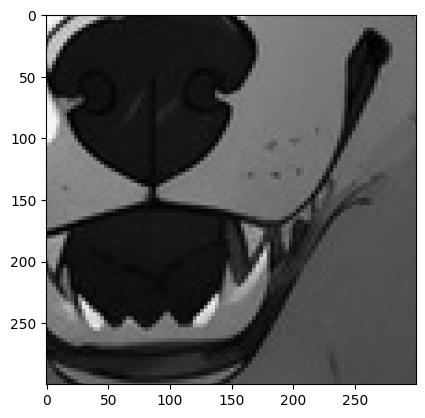

In [221]:
zoomIn = grayimg[700:1000, 700:1000]
plt.imshow(zoomIn)
plt.show()

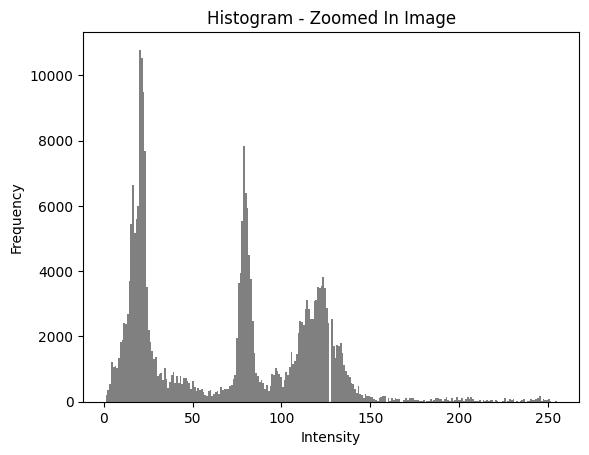

In [222]:
histogram_zoomIn = plt.hist(zoomIn.ravel(), bins=256, color='gray')

# Menampilkan histogram
plt.title('Histogram - Zoomed In Image')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

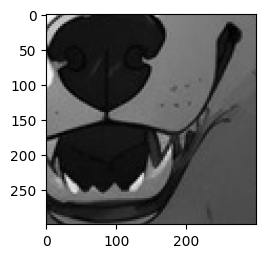

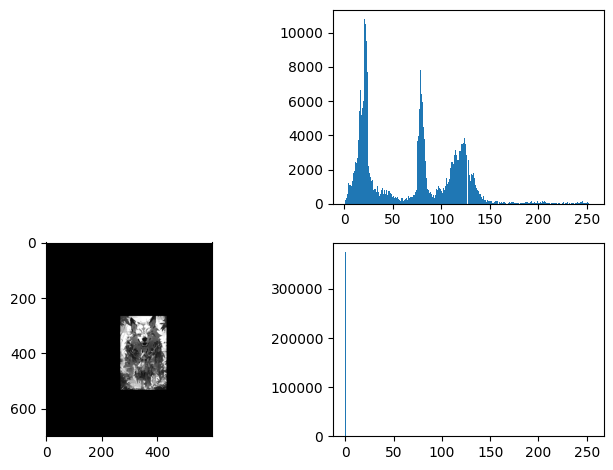

In [223]:

grayimg = cv.imread('respon.jpg', cv.IMREAD_GRAYSCALE)

tinggi, lebar = grayimg.shape

dilatasiImage = np.zeros((tinggi//3, lebar//3), dtype=np.uint8)

for i in range(tinggi//3):
    for j in range(lebar//3):
        dilatasiImage[i, j] = grayimg[i*3, j*3]


padding = ((grayimg.shape[0] - dilatasiImage.shape[0]) // 2, (grayimg.shape[1] - dilatasiImage.shape[1]) // 2)
dilatasiImagePad = np.pad(dilatasiImage, [padding, padding])


plt.figure(figsize=(12, 6))


plt.subplot(2, 2, 1)
plt.imshow(zoomIn)
plt.show()

plt.subplot(2, 2, 2)
plt.hist(zoomIn.ravel(), bins=256)

plt.subplot(2, 2, 3)
plt.imshow(dilatasiImagePad, cmap='gray')

plt.subplot(2, 2, 4)
plt.hist(dilatasiImagePad.ravel(), bins=256)

plt.tight_layout()
plt.show()
